In [58]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

In [60]:
pokemon =pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [61]:
pokemon.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

>Data Wrangling Step


In [62]:
pokemon_types=pokemon.melt(id_vars=['id', 'species'],
            value_vars=['type_1', 'type_2'],
            var_name='type_level',
            value_name='type')
pokemon_types.sample(10)

,id,species,type_level,type
46,47,parasect,type_1,bug
329,330,flygon,type_1,ground
688,689,barbaracle,type_1,rock
1047,241,miltank,type_2,NaN
684,685,slurpuff,type_1,fairy
526,527,woobat,type_1,psychic
1143,337,lunatone,type_2,psychic
1582,776,turtonator,type_2,dragon
308,309,electrike,type_1,electric
582,583,vanillish,type_1,ice


>Example 1 - Step 3. Find the frequency of unique values in the type column


In [63]:
type_counts=pokemon_types['type'].value_counts()
type_orders=type_counts.index

>Example 1 - Step 4. Plot the horizontal bar charts


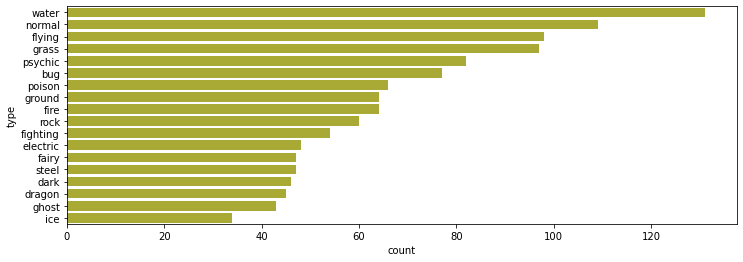

In [64]:
basecolor=sb.color_palette()[8]
sb.countplot(data=pokemon_types, y='type', color=basecolor,
            order=type_orders);

>Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.
<br>Example 2 - Step 1. Find the Correction 1: the variable 'identifier' shown in the video is actually the 'species' column in the dataset.

In [65]:
print(pokemon_types['type'].value_counts())

# Returns the sum of all not-null values in `type` column
n_pokemon = pokemon_types['type'].value_counts().sum()
print(n_pokemon)


# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
print(max_type_count)


# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64
1212
131
0.10808580858085809


>Example 2 - Step 2. Create an array of evenly spaced proportioned values


In [66]:
ticks_props=np.arange(0,max_prop,0.02)
ticks_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

>Example 2 - Step 3. Create a list of String values that can be used as tick labels.

In [67]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details

ticks_names=['{:0.2f}'.format(v) for v in ticks_props]
ticks_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

>Example 2 - Step 4. Plot the bar chart, with new x-tick labels


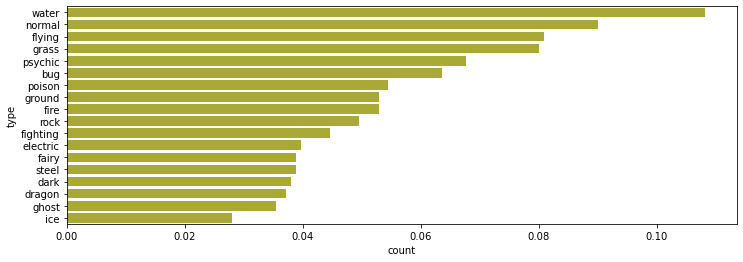

In [68]:
sb.countplot(data= pokemon_types, y='type', color=basecolor,
            order=type_orders);
plt.xticks(ticks_props*n_pokemon, ticks_names);

>Example 3. Print the text (proportion) on the bars of a horizontal plot.


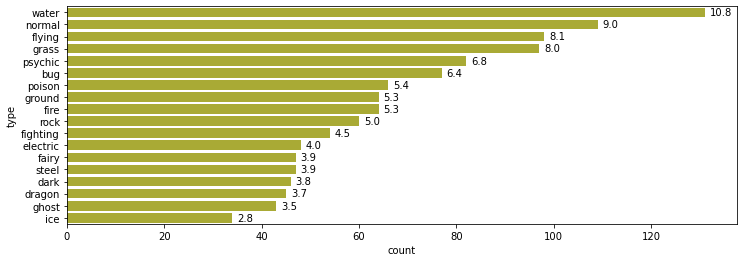

In [69]:
sb.countplot(data=pokemon_types, y='type', color=basecolor, order=type_orders);

for i in range(type_counts.shape[0]):
    count=type_counts[i]
    pcs_string='{:0.1f}'.format(100*count/n_pokemon)
    plt.text(count+1, i, pcs_string, va='center')

>Example 4. Print the text (proportion) below the bars of a Vertical plot.


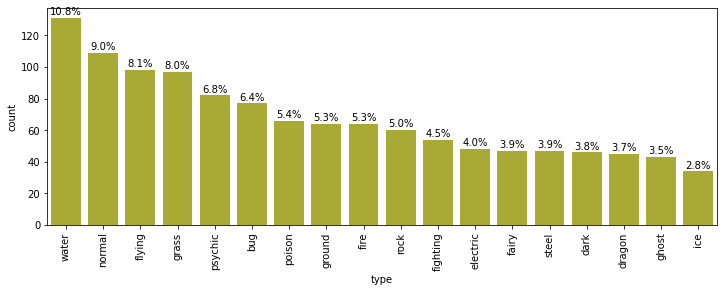

In [70]:
sb.countplot(data=pokemon_types, x='type', color=basecolor, order=type_orders);

type_counts=pokemon_types['type'].value_counts()

locs,labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count=type_counts[label.get_text()]
    pcs_string='{:0.1f}%'.format(100*count/n_pokemon)
    
    plt.text(loc, count+2, pcs_string, ha='center', color='black')